# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
# Libraries for data preparation and model building
PARAMETER_CONSTANT = 10

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Setting global constants to ensure notebook results are reproducible


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data

df = pd.read_csv('df_train.csv', index_col=[0])

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
# look at data statistics

# OUTLIERS
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [6]:
df.shape

(8763, 48)

In [7]:
pd.set_option('display.max_columns', 50)

In [8]:
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [12]:
df.isna().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [10]:
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean())

In [11]:
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1012.051407,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [13]:
# FIND DUPLICATES

df.duplicated().sum()

0

In [ ]:
# CHANGE STR COLUMNS TO NUMERIC DATATYPE

In [14]:
# REMOVING STRINGS

df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str[6:]

In [15]:
# CHANGE DATATYPE TO FLOAT
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype(float)

In [16]:
df['Seville_pressure'] = df['Seville_pressure'].str[2:]

In [17]:
df['Seville_pressure'] = df['Seville_pressure'].astype(float)

In [18]:
# REMOVING THE TIME COLUMN

df.drop(['time'], axis=1, inplace= True)

In [19]:
# SORTING THE HEADERS SO THAT WE CAN SEE DATA RELATING TO THE SAME CITY AT A GLANCE

df.sort_index(axis=1, inplace= True)

In [20]:
df

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_weather_id,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_weather_id,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_weather_id,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h
0,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,800.0,42.666667,6.333333,0.000000,1035.000000,0.0,0.0,269.338615,269.338615,269.338615,800.000000,223.333333,1.000000,0.000000,64.000000,971.333333,0.0,265.938000,265.938000,265.938000,800.000000,0.666667,0.000000,74.333333,25.0,0.0,0.0,274.254667,274.254667,274.254667,800.000000,3.333333,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,5.0,0.666667,6715.666667
1,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,800.0,139.000000,4.000000,0.000000,1035.666667,0.0,0.0,270.376000,270.376000,270.376000,800.000000,221.000000,1.000000,0.000000,64.666667,972.666667,0.0,266.386667,266.386667,266.386667,800.000000,0.333333,0.000000,78.333333,25.0,0.0,0.0,274.945000,274.945000,274.945000,800.000000,3.333333,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,10.0,1.666667,4171.666667
2,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,800.0,326.000000,2.000000,0.000000,1036.000000,0.0,0.0,275.027229,275.027229,275.027229,800.000000,214.333333,1.000000,0.000000,64.333333,974.000000,0.0,272.708667,272.708667,272.708667,800.000000,1.000000,0.000000,71.333333,25.0,0.0,0.0,278.792000,278.792000,278.792000,800.000000,2.666667,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,9.0,1.000000,4274.666667
3,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,800.0,273.000000,2.333333,0.000000,1036.000000,0.0,0.0,281.135063,281.135063,281.135063,800.000000,199.666667,1.000000,0.000000,56.333333,994.666667,0.0,281.895219,281.895219,281.895219,800.000000,1.000000,0.000000,65.333333,25.0,0.0,0.0,285.394000,285.394000,285.394000,800.000000,4.000000,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,8.0,1.000000,5075.666667
4,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,800.0,260.000000,4.333333,2.000000,1035.333333,0.0,0.0,282.252063,282.252063,282.252063,800.000000,185.000000,0.333333,0.000000,57.000000,1035.333333,0.0,280.678437,280.678437,280.678437,800.000000,1.000000,0.000000,59.000000,25.0,0.0,0.0,285.513719,285.513719,285.513719,800.000000,3.000000,58.333333,1012.051407,0.0,283.015115,283.015115,283.015115,7.0,1.000000,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1021.000000,0.0,0.0,281.276667,282.150000,280.483333,801.0,83.666667,1.666667,56.666667,1017.666667,0.0,0.0,287.573333,290.150000,285.150000,802.333333,226.666667,4.333333,45.000000,95.666667,1024.000000,0.0,279.686667,280.816667,278.483333,727.666667,1.000000,80.000000,89.000000,23.0,0.0,0.0,285.076667,285.483333,284.816667,769.333333,1.000000,71.333333,1012.051407,0.0,282.483333,282.483333,282.483333,6.0,2.666667,-28.333333
8759,1019.000000,0.0,0.0,287.483333,287.816667,287.150000,801.0,213.333333,3.000000,26.666667,1015.333333,0.0,0.0,288.616667,291.150000,286.483333,801.333333,220.000000,8.000000,85.000000,85.000000,1023.666667,0.0,282.400000,283.483333,280.150000,762.000000,5.000000,75.000000,82.000000,23.0,0.0,0.0,287.673333,288.483333,287.150000,803.000000,1.666667,40.333333,1021.000000,0.0,291.816667,291.816667,291.816667,6.0,2.

In [21]:
df.corr()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_weather_id,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_weather_id,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_weather_id,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h
Barcelona_pressure,1.000000,0.053550,-0.002796,-0.033221,-0.034412,-0.029612,-0.013790,-0.001079,0.001280,0.037506,-0.014092,0.052458,-0.001539,-0.027410,-0.031854,-0.022514,-0.048567,0.034220,0.009572,0.010833,0.025198,-0.091181,-0.003937,-0.017886,-0.015984,-0.017819,0.004365,0.011134,0.020264,0.021599,0.020527,0.003875,-0.001685,-0.041542,-0.047179,-0.032889,-0.014359,-0.008853,-0.003012,-0.007767,-0.000473,-0.028260,-0.029292,-0.026596,0.026729,0.050282,-0.034385
Barcelona_rain_1h,0.053550,1.000000,-0.020084,0.060384,0.083288,0.023582,-0.525751,-0.037854,0.042136,0.052913,-0.055521,0.052558,0.067461,0.034889,0.032362,0.031765,-0.051911,0.026187,-0.026640,0.008570,-0.061265,-0.016906,0.065321,0.075013,0.079558,0.070146,-0.038090,0.062758,0.003590,-0.051022,-0.056790,0.050899,-0.012500,0.069337,0.064457,0.065312,-0.007767,0.074540,0.009027,-0.001685,0.042576,0.045358,0.068789,0.015905,0.000699,0.031804,-0.056633
Barcelona_rain_3h,-0.002796,-0.020084,1.000000,-0.042970,-0.051365,-0.029398,0.026554,-0.011875,-0.001722,-0.041013,0.025215,-0.001412,0.002985,-0.043223,-0.059089,-0.027060,-0.002715,0.007202,-0.038246,-0.000355,0.017797,0.036706,0.018953,-0.039565,-0.046967,-0.029094,-0.006607,-0.014644,0.029194,0.015555,0.022924,0.007454,0.145740,-0.039126,-0.070069,-0.012016,-0.017497,-0.019804,0.002920,0.023480,-0.001905,-0.058942,-0.061068,-0.055676,0.016777,-0.037553,-0.024720
Barcelona_temp,-0.033221,0.060384,-0.042970,1.000000,0.974480,0.964089,0.029239,-0.189016,0.116240,-0.023171,-0.229760,-0.138901,-0.086561,0.865705,0.831470,0.867434,0.128188,0.068701,0.018967,-0.223940,-0.684867,0.010542,-0.054825,0.903143,0.900428,0.868222,0.085587,0.080133,-0.186463,-0.617797,-0.399793,-0.098982,-0.041804,0.852651,0.693193,0.873170,0.168608,0.085395,-0.247168,0.022248,-0.029135,0.914601,0.912094,0.892024,-0.260622,-0.021456,0.182673
Barcelona_temp_max,-0.034412,0.083288,-0.051365,0.974480,1.000000,0.885911,0.018332,-0.151302,0.114497,-0.034040,-0.217623,-0.157326,-0.087943,0.867268,0.844563,0.854620,0.146071,0.049775,0.011151,-0.242409,-0.691803,0.072290,-0.072734,0.896766,0.906248,0.847888,0.105912,0.061854,-0.205060,-0.606770,-0.413186,-0.110305,-0.049273,0.866389,0.738489,0.862597,0.176048,0.068902,-0.221430,0.085159,-0.029249,0.901400,0.918256,0.860510,-0.260643,-0.040998,0.164734
Barcelona_temp_min,-0.029612,0.023582,-0.029398,0.964089,0.885911,1.000000,0.046167,-0.226583,0.109268,-0.010804,-0.230942,-0.106593,-0.079382,0.810785,0.764031,0.831224,0.098428,0.086482,0.023711,-0.188578,-0.636777,-0.068083,-0.028900,0.853881,0.836680,0.838985,0.056176,0.089992,-0.153412,-0.595065,-0.348312,-0.078631,-0.029569,0.779252,0.586923,0.831689,0.150195,0.097407,-0.266820,-0.056920,-0.027172,0.874447,0.845057,0.879687,-0.240981,0.001413,0.195984
Barcelona_weather_id,-0.013790,-0.525751,0.026554,0.029239,0.018332,0.046167,1.000000,0.151534,-0.048004,-0.124169,0.128763,-0.120618,-0.033598,0.053303,0.054720,0.053279,0.119813,-0.053839,-0.003074,-0.119970,-0.051139,0.031370,-0.144551,0.025671,0.027375,0.026252,0.137262,-0.099582,-0.099166,-0.050515,0.152540,-0.159181,0.023488,0.014065,-0.000401,0.020735,0.123593,-0.056570,-0.096343,0.064216,-0.005456,0.03131

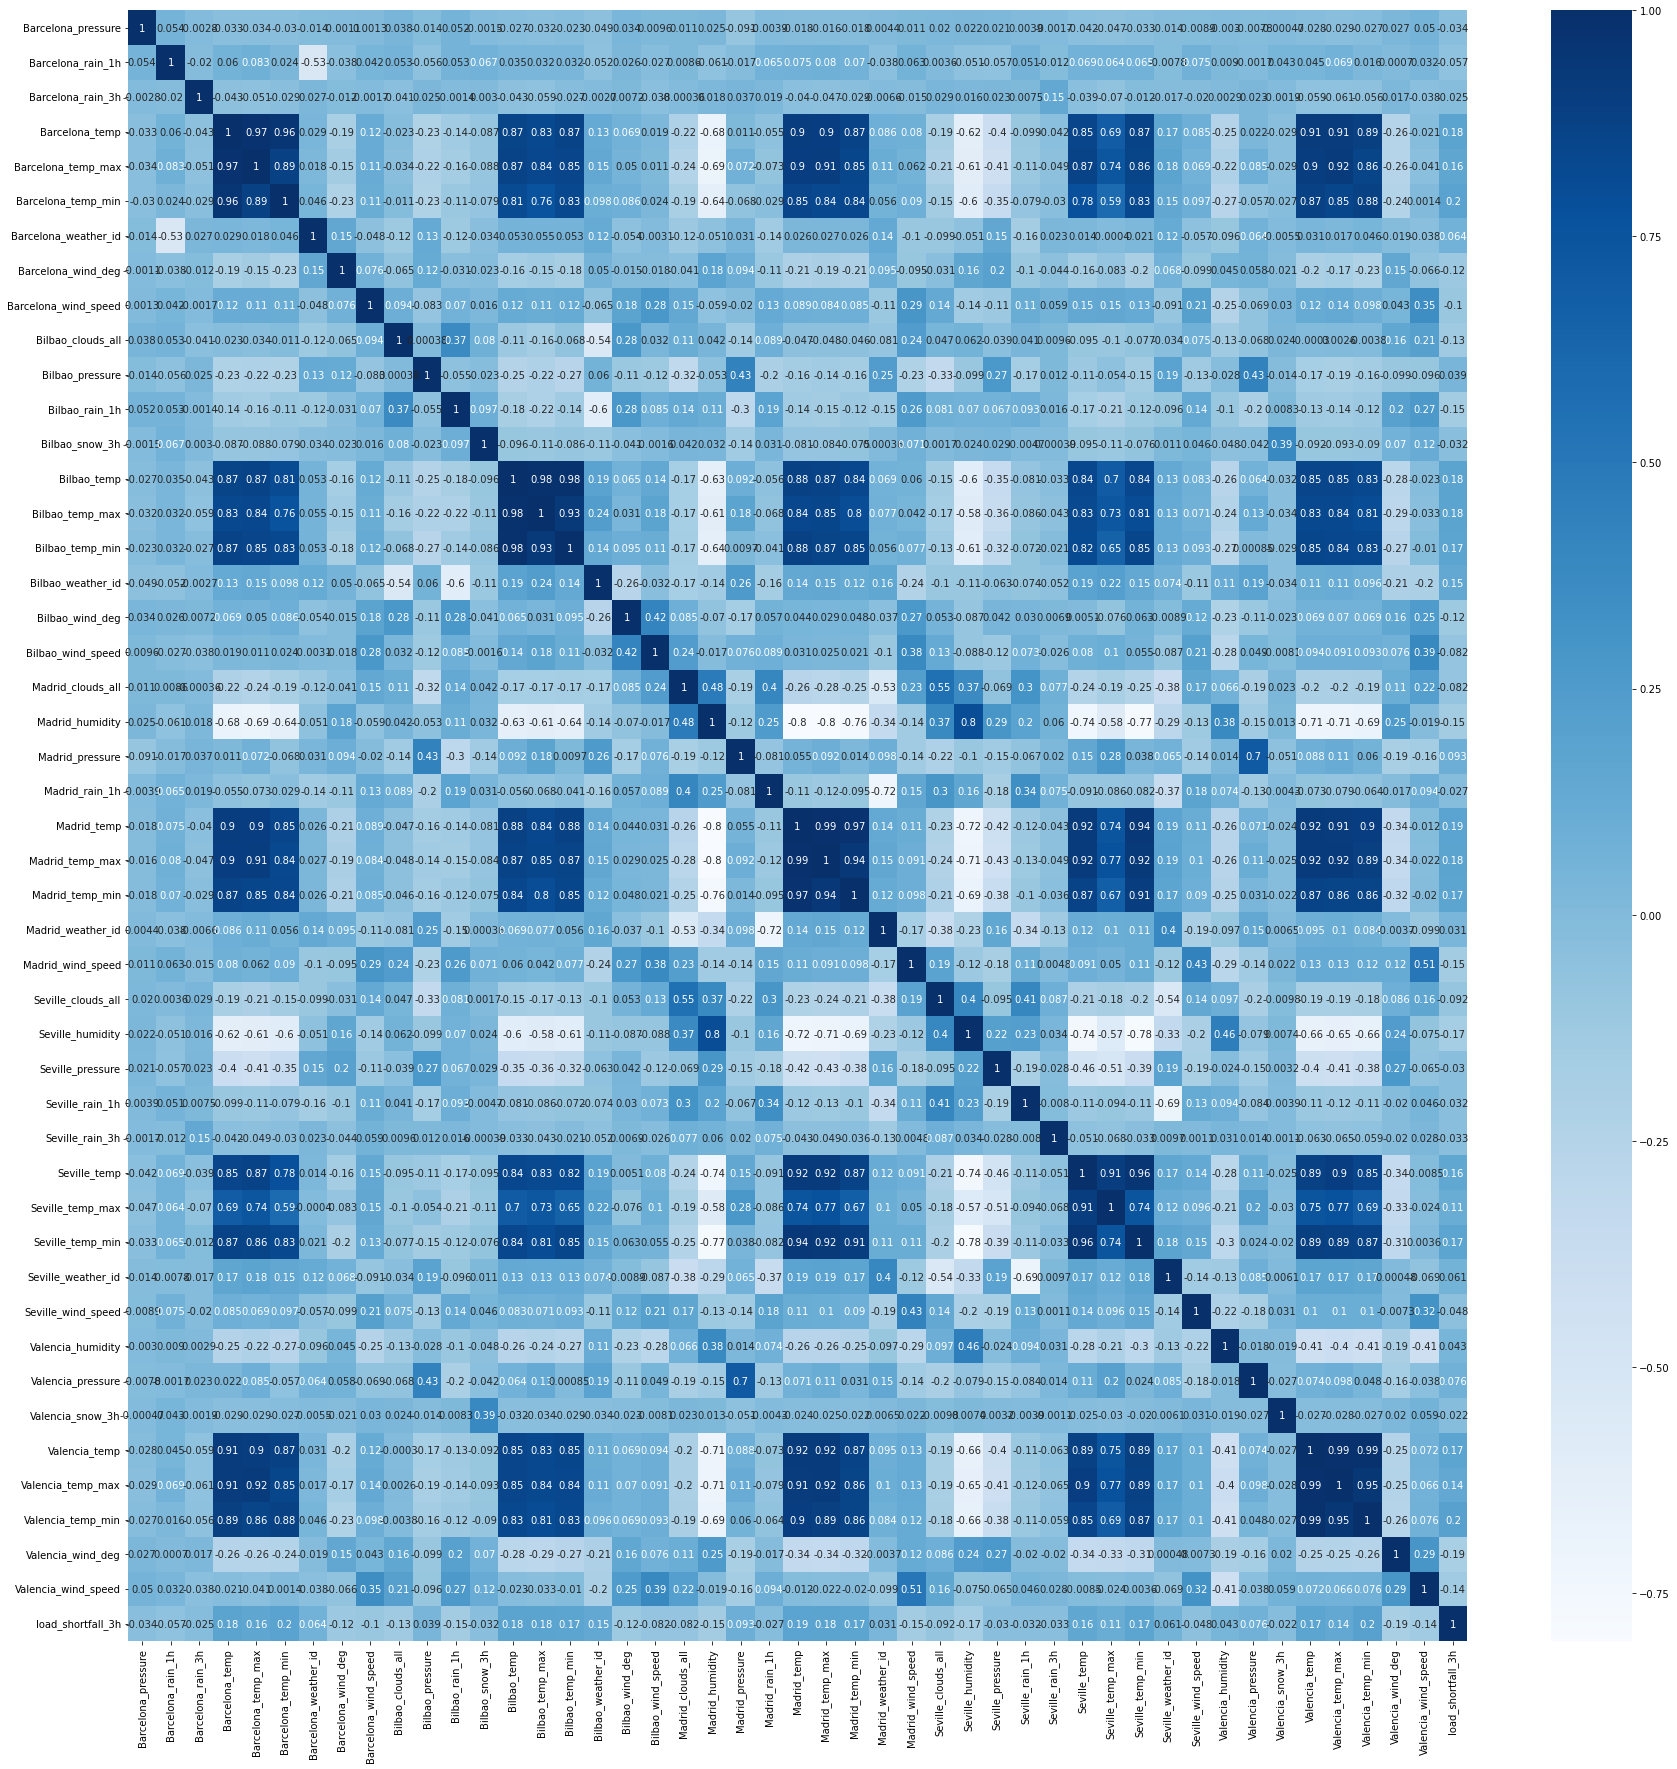

In [22]:
fig = plt.figure(figsize=(30,30));

sb.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
# plot relevant feature interactions

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# TRAIN_TEST_SPLIT

In [23]:
x = df.iloc[:, :-1]

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_weather_id,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_weather_id,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_weather_id,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed
0,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,800.0,42.666667,6.333333,0.000000,1035.000000,0.0,0.0,269.338615,269.338615,269.338615,800.000000,223.333333,1.000000,0.000000,64.000000,971.333333,0.0,265.938000,265.938000,265.938000,800.000000,0.666667,0.000000,74.333333,25.0,0.0,0.0,274.254667,274.254667,274.254667,800.000000,3.333333,75.666667,1002.666667,0.0,269.888000,269.888000,269.888000,5.0,0.666667
1,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,800.0,139.000000,4.000000,0.000000,1035.666667,0.0,0.0,270.376000,270.376000,270.376000,800.000000,221.000000,1.000000,0.000000,64.666667,972.666667,0.0,266.386667,266.386667,266.386667,800.000000,0.333333,0.000000,78.333333,25.0,0.0,0.0,274.945000,274.945000,274.945000,800.000000,3.333333,71.000000,1004.333333,0.0,271.728333,271.728333,271.728333,10.0,1.666667
2,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,800.0,326.000000,2.000000,0.000000,1036.000000,0.0,0.0,275.027229,275.027229,275.027229,800.000000,214.333333,1.000000,0.000000,64.333333,974.000000,0.0,272.708667,272.708667,272.708667,800.000000,1.000000,0.000000,71.333333,25.0,0.0,0.0,278.792000,278.792000,278.792000,800.000000,2.666667,65.666667,1005.333333,0.0,278.008667,278.008667,278.008667,9.0,1.000000
3,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,800.0,273.000000,2.333333,0.000000,1036.000000,0.0,0.0,281.135063,281.135063,281.135063,800.000000,199.666667,1.000000,0.000000,56.333333,994.666667,0.0,281.895219,281.895219,281.895219,800.000000,1.000000,0.000000,65.333333,25.0,0.0,0.0,285.394000,285.394000,285.394000,800.000000,4.000000,54.000000,1009.000000,0.0,284.899552,284.899552,284.899552,8.0,1.000000
4,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,800.0,260.000000,4.333333,2.000000,1035.333333,0.0,0.0,282.252063,282.252063,282.252063,800.000000,185.000000,0.333333,0.000000,57.000000,1035.333333,0.0,280.678437,280.678437,280.678437,800.000000,1.000000,0.000000,59.000000,25.0,0.0,0.0,285.513719,285.513719,285.513719,800.000000,3.000000,58.333333,1012.051407,0.0,283.015115,283.015115,283.015115,7.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1021.000000,0.0,0.0,281.276667,282.150000,280.483333,801.0,83.666667,1.666667,56.666667,1017.666667,0.0,0.0,287.573333,290.150000,285.150000,802.333333,226.666667,4.333333,45.000000,95.666667,1024.000000,0.0,279.686667,280.816667,278.483333,727.666667,1.000000,80.000000,89.000000,23.0,0.0,0.0,285.076667,285.483333,284.816667,769.333333,1.000000,71.333333,1012.051407,0.0,282.483333,282.483333,282.483333,6.0,2.666667
8759,1019.000000,0.0,0.0,287.483333,287.816667,287.150000,801.0,213.333333,3.000000,26.666667,1015.333333,0.0,0.0,288.616667,291.150000,286.483333,801.333333,220.000000,8.000000,85.000000,85.000000,1023.666667,0.0,282.400000,283.483333,280.150000,762.000000,5.000000,75.000000,82.000000,23.0,0.0,0.0,287.673333,288.483333,287.150000,803.000000,1.666667,40.333333,1021.000000,0.0,291.816667,291.816667,291.816667,6.0,2.000000
8760,1015.666667,0.0,0.0,289.816667,290.483333,289.150000,801.0,256.666667,5.333333,63

In [24]:
y = df.iloc[:, -1:]
y

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667
...,...
8758,-28.333333
8759,2266.666667
8760,822.000000
8761,-760.000000


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = PARAMETER_CONSTANT)

In [ ]:
# NORMALIZING THE DATA

In [34]:
norm = StandardScaler()

In [ ]:
norm.fit_transform(x_train, y_train)

In [37]:
LR = LinearRegression()

In [39]:
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
X = df.X[:,np.newaxis] 

In [ ]:
lm.fit(X, df.Y)

In [40]:
from sklearn import metrics

In [ ]:
print('MSE:', metrics.mean_squared_error(df.Y, gen_y))

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic